In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brandonbell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
df = pd.read_csv('TIKTOK_REVIEWS.csv', index_col=0)

In [25]:
print(df.describe())

       review_rating  review_likes
count   3.465866e+06  3.465866e+06
mean    4.276736e+00  2.276074e+00
std     1.404582e+00  1.432944e+02
min     1.000000e+00  0.000000e+00
25%     5.000000e+00  0.000000e+00
50%     5.000000e+00  0.000000e+00
75%     5.000000e+00  0.000000e+00
max     5.000000e+00  6.551500e+04


In [27]:
df['review_length'] = df['review_text'].apply(str).apply(len)
print(df['review_length'].describe())

count    3.465866e+06
mean     3.456464e+01
std      5.780251e+01
min      1.000000e+00
25%      8.000000e+00
50%      1.500000e+01
75%      3.600000e+01
max      2.286000e+03
Name: review_length, dtype: float64


# Exploratory Data Analysis

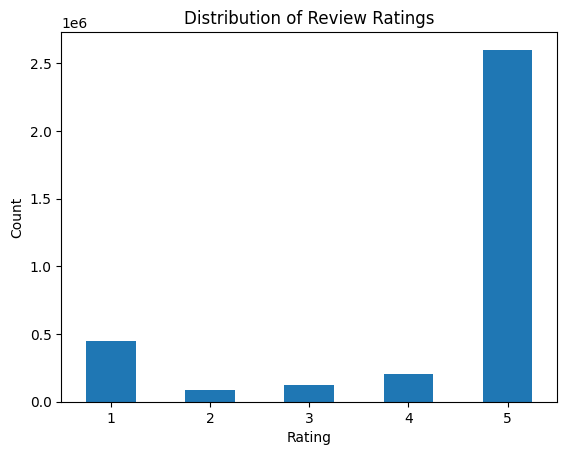

In [29]:
df['review_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


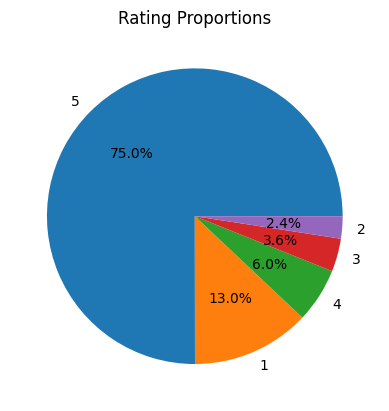

In [30]:
df['review_rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Rating Proportions')
plt.ylabel('')
plt.show()

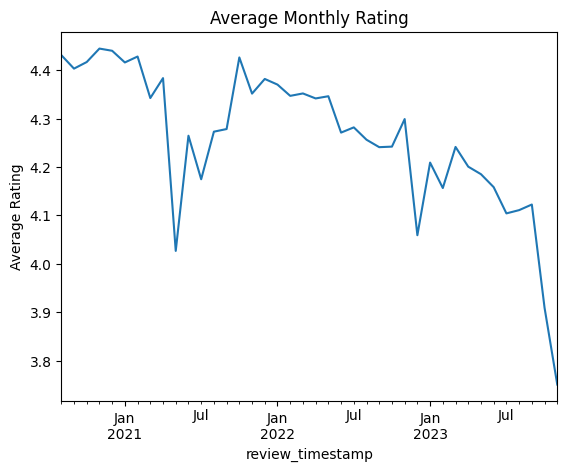

In [32]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])
df.set_index('review_timestamp')['review_rating'].resample('M').mean().plot()
plt.title('Average Monthly Rating')
plt.ylabel('Average Rating')
plt.show()

In [37]:
# Convert ratings to a binary sentiment indicator
df['sentiment'] = df['review_rating'] >= 4  # Assuming 4 and 5 as positive, rest as negative

# Selecting relevant columns
df = df[['review_text', 'sentiment']]

In [40]:
df['review_text'] = df['review_text'].astype(str)
df['review_text'].fillna("missing", inplace=True)

In [44]:
test_df = df[:100000]

In [45]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    return " ".join(stopwords_removed)


import swifter

# Apply the function in a parallelized manner
test_df['processed_text'] = test_df['review_text'].swifter.apply(preprocess_text)

/Users/brandonbell/Desktop/coding/coding_studies/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pandas Apply: 100%|██████████| 100000/100000 [03:25<00:00, 487.53it/s]
/var/folders/71/f3p4rldx7jx5njbhg26bqy340000gn/T/ipykernel_70898/215838832.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['processed_text'] = test_df['review_text'].swifter.apply(preprocess_text)


In [46]:
test_df

,review_text,sentiment,processed_text
0,Adil_abbas7,True,adil_abbas7
1,best app,True,best app
2,Gondal Badsha Mandi alaa,True,gondal badsha mandi alaa
3,Ubaidgame,True,ubaidgame
4,Best app,True,best app
...,...,...,...
99995,Tik Tok is gay,False,tik tok gay
99996,ориг тэк ток,True,ориг тэк ток
99997,good,False,good
99998,Love appppp,True,love appppp


In [47]:
X_train, X_test, y_train, y_test = train_test_split(test_df['processed_text'], test_df['sentiment'], test_size=0.2, random_state=42)

In [48]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [49]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)


/Users/brandonbell/Desktop/coding/coding_studies/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88675

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.37      0.51      3134
        True       0.89      0.98      0.94     16866

    accuracy                           0.89     20000
   macro avg       0.84      0.68      0.72     20000
weighted avg       0.88      0.89      0.87     20000

